In [133]:
import pandas as pd
from src.report.helper import get_age_group
import numpy as np
import matplotlib.pyplot as plt

#### get DFs

In [134]:
df_women= pd.read_csv("./data/2024/W_athlete_information.csv")
df_women.set_index('name', inplace=True)
df_men = pd.read_csv("./data/2024/M_athlete_information.csv")
df_men.set_index('name', inplace=True)

In [135]:
df_women['ageGroup'] = np.nan
df_women['born'] = pd.to_datetime(df_women["born"], format="%d.%m.%Y")
df_men['ageGroup'] = np.nan
df_men['born'] = pd.to_datetime(df_men["born"], format="%d.%m.%Y")

In [136]:
df_women.drop(['height', 'weight', 'skis', 'boots', 'poles'], axis=1,inplace = True)
df_men.drop(['height', 'weight', 'skis', 'boots', 'poles'], axis=1,inplace = True)

#### insert new column ageGroup (cube, youth, normal, vet)

In [137]:
df_women['ageGroup'] = df_women['born'].apply(get_age_group)
df_men['ageGroup'] = df_men['born'].apply(get_age_group)

#### age group distribution seperated by gender

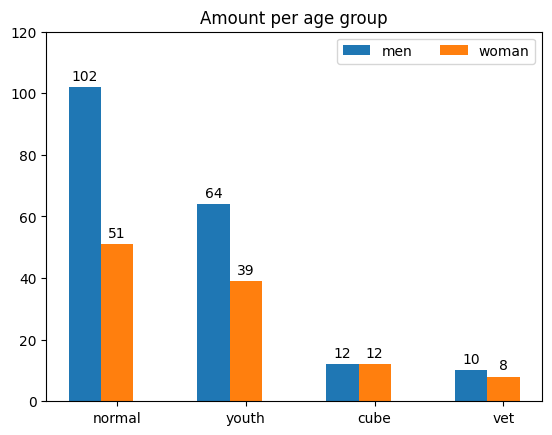

In [78]:
group_amount_woman = df_women['ageGroup'].value_counts()
group_amount_men = df_men['ageGroup'].value_counts()
amount_per_group = {
    'men': group_amount_men.to_list(),
    'woman': group_amount_woman.to_list()
}
x_attributes = ["normal", "youth", "cube", "vet"]
x = np.arange(len(x_attributes))

width = 0.25  # the width of the bars
multiplier = 0
ax = plt.subplots()[1]

for attr, meas in amount_per_group.items():
    offset = width * multiplier
    rects = ax.bar(x+offset, meas, width, label=attr)
    ax.bar_label(rects, padding=3)
    multiplier +=1

ax.set_title("Amount per age group")
ax.set_xticks(x + width, x_attributes )
ax.legend(loc='upper right', ncols=2)
ax.set_ylim(0,120)
plt.show()

#### age group distribution seperated by team

In [138]:
df_gender_combined = pd.concat([df_men, df_women])
df_gender_combined.drop('rank',axis=1, inplace = True)
series_team_ageGroup = df_gender_combined.groupby('team')['ageGroup'].value_counts()
df_team_ageGroup = series_team_ageGroup.to_frame()
df_team_ageGroup= df_team_ageGroup.unstack(level=-1)
df_team_ageGroup.columns = df_team_ageGroup.columns.droplevel(0)
df_team_ageGroup=df_team_ageGroup.replace(np.nan, 0)

In [139]:
y_attributes:list = df_team_ageGroup.index.to_list()
y = np.arange(len(x_attributes))
columns:list = df_team_ageGroup.columns.tolist()
ageGroup_per_team:dict = {column: df_team_ageGroup[column].to_list() for column in columns}

/var/folders/wf/q6zcggt560gc1t4_840dvznm0000gn/T/ipykernel_55707/4136474066.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(bottom[i] + value / 2, i, str(int(value)), ha='center', va='center', color='black')


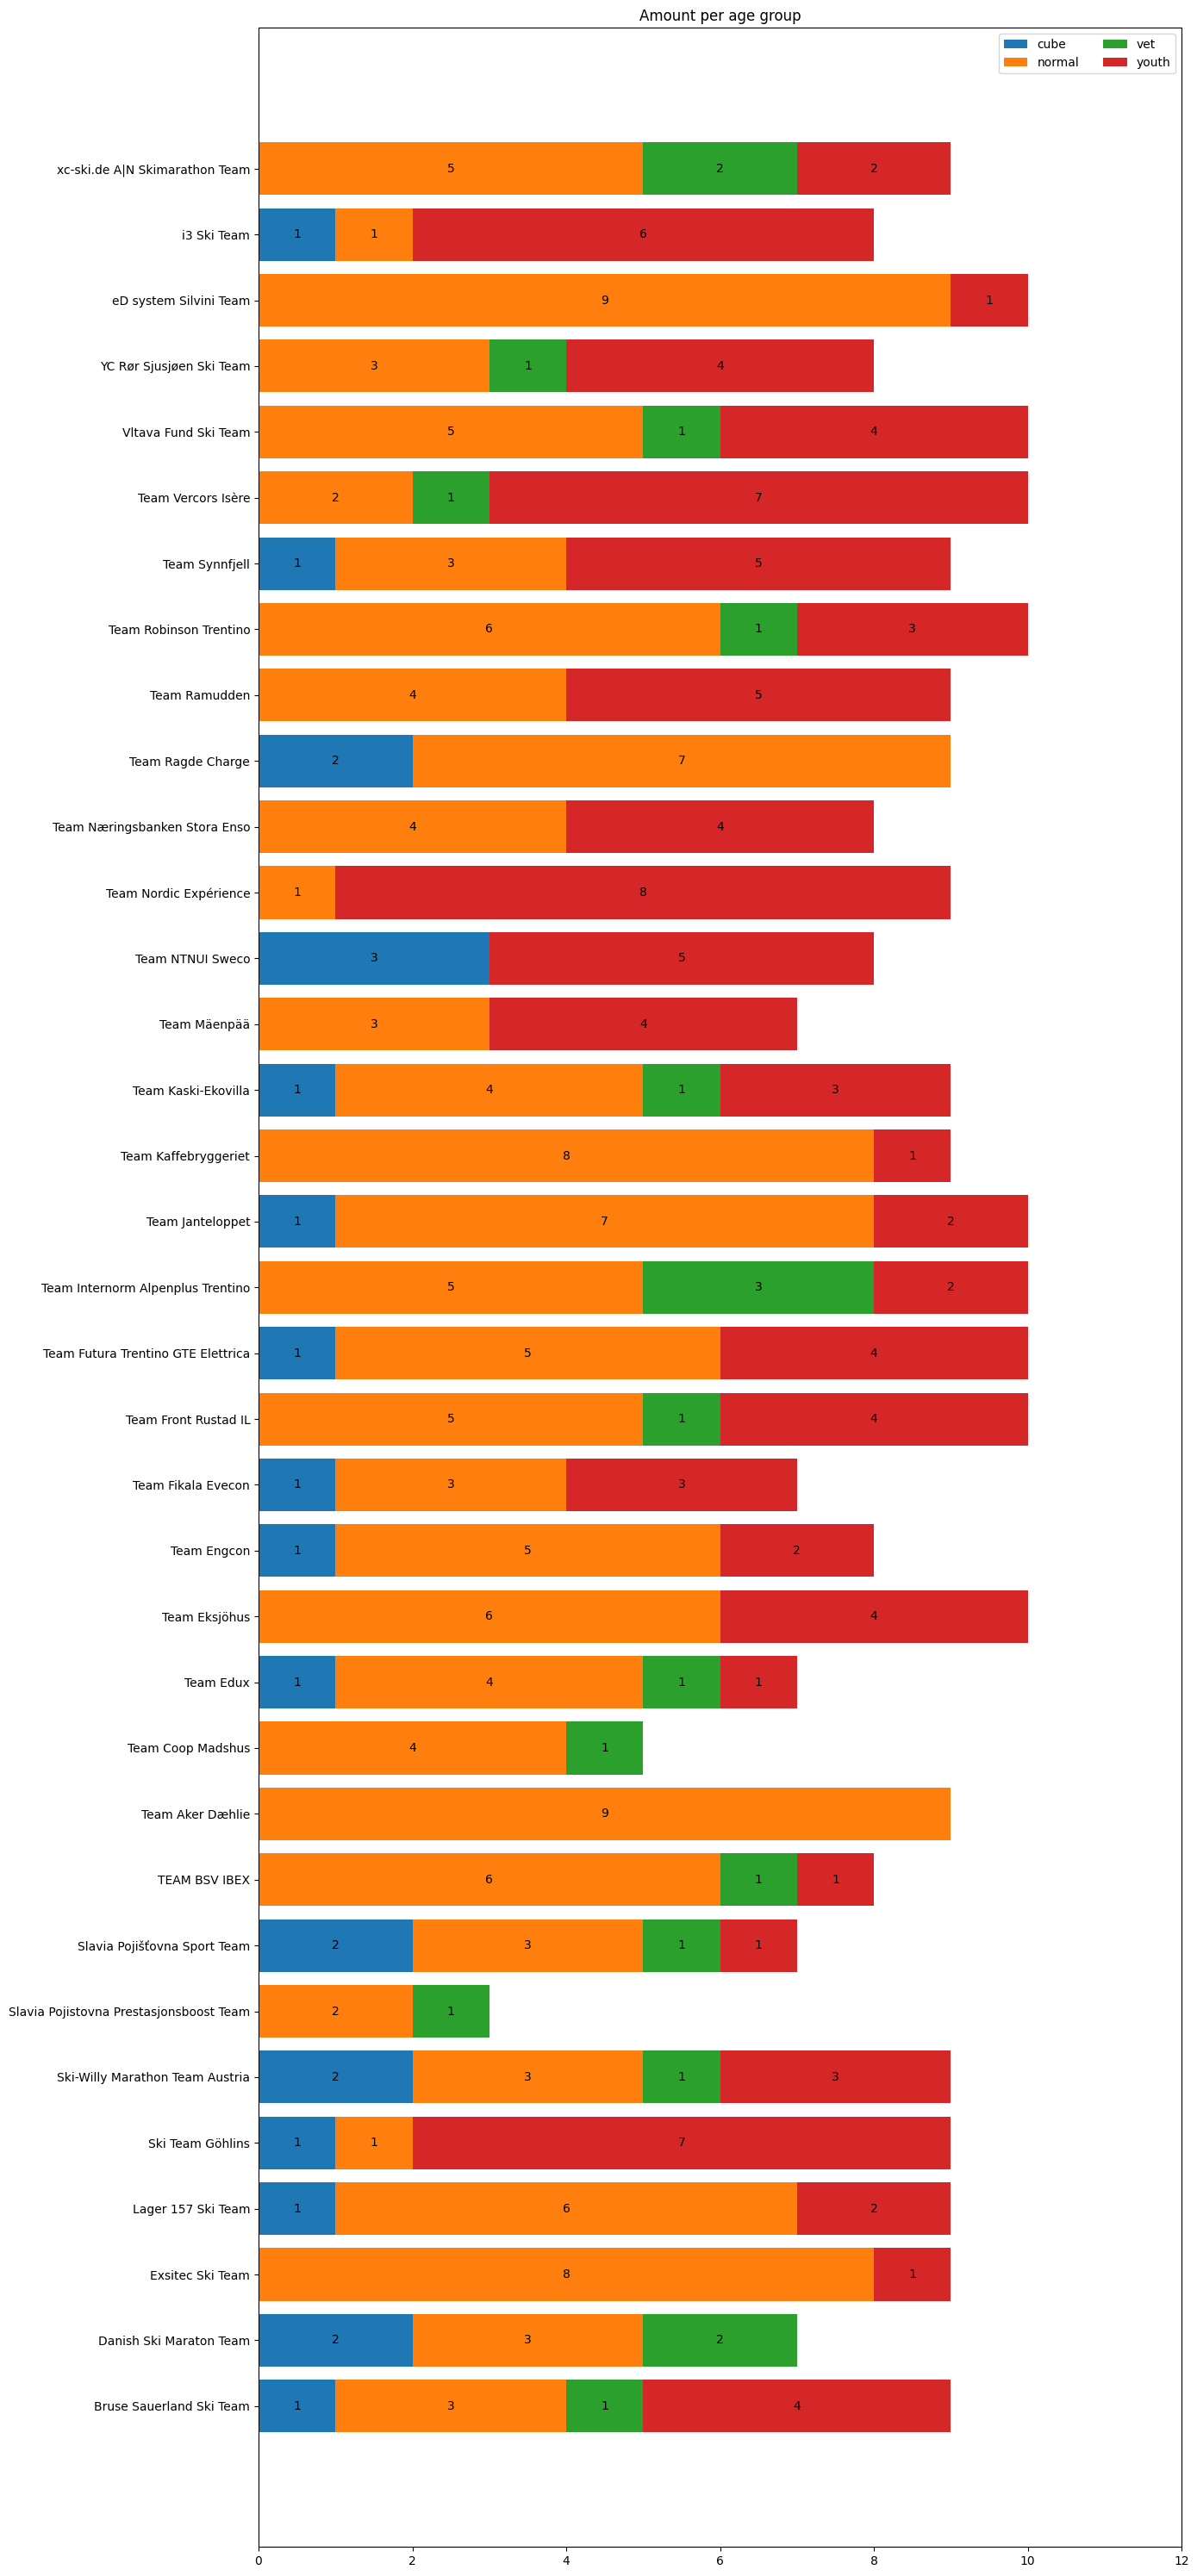

In [148]:

ax = plt.subplots(figsize=(14,30))[1]
bottom = [0] * len(df_team_ageGroup)
for ageGroup in df_team_ageGroup.columns:
    p = ax.barh(df_team_ageGroup.index, df_team_ageGroup[ageGroup],left=bottom, label=ageGroup)
    for i, value in enumerate(df_team_ageGroup[ageGroup]):
        if value > 0:  # Only label non-zero values
            ax.text(bottom[i] + value / 2, i, str(int(value)), ha='center', va='center', color='black')
    
    bottom += df_team_ageGroup[ageGroup]
    

ax.set_title("Amount per age group")
#ax.set_yticks(len(df_team_ageGroup.index.to_list()) , df_team_ageGroup.index)
ax.legend(loc='upper right', ncols=2)
ax.set_xlim(0,12)
#multiplier = 0
plt.tight_layout()
plt.show()

### inspect cubes

#### women

In [22]:
cubes_wmn = df_women[df_women['ageGroup']=='cube']
cubes_wmn.sort_values("born", ascending=False)

,rank,team,points,born,nation,ageGroup
name,,,,,,
Hana Randáková,107,Slavia Pojišťovna Sport Team,5,2005-05-16,CZE,cube
Ebba Johansson,98,Danish Ski Maraton Team,37,2005-03-14,SWE,cube
Suzette Christin,71,i3 Ski Team,109,2004-04-20,FRA,cube
Wilma Lax,106,Team Edux,6,2004-04-18,FIN,cube
Sigrun Kleinrath,104,Ski-Willy Marathon Team Austria,7,2004-01-16,AUT,cube
Solveig Lie Støverud,61,Team Ragde Charge,183,2004-01-15,NOR,cube
Camilla Brørs,31,Team NTNUI Sweco,479,2003-11-26,NOR,cube
Eva Močnik,108,Ski-Willy Marathon Team Austria,1,2003-11-01,SLO,cube
Fanny Kukonlehto,52,Team Kaski-Ekovilla,263,2003-08-02,FIN,cube


In [24]:
cubes_wmn.sort_values("rank").head(5)

,rank,team,points,born,nation,ageGroup
name,,,,,,
Tove Ericsson,22,Team Engcon,658,2003-03-05,SWE,cube
Camilla Brørs,31,Team NTNUI Sweco,479,2003-11-26,NOR,cube
Fanny Kukonlehto,52,Team Kaski-Ekovilla,263,2003-08-02,FIN,cube
Solveig Lie Støverud,61,Team Ragde Charge,183,2004-01-15,NOR,cube
Suzette Christin,71,i3 Ski Team,109,2004-04-20,FRA,cube


In [25]:
cubes_wmn['team'].value_counts()

team
Ski-Willy Marathon Team Austria       2
Team Engcon                           1
Team NTNUI Sweco                      1
Team Kaski-Ekovilla                   1
Team Ragde Charge                     1
i3 Ski Team                           1
Team Fikala Evecon                    1
Danish Ski Maraton Team               1
Team Futura Trentino GTE Elettrica    1
Team Edux                             1
Slavia Pojišťovna Sport Team          1
Name: count, dtype: int64

In [26]:
cubes_wmn['nation'].value_counts()

nation
NOR    3
SWE    2
FIN    2
FRA    1
EST    1
AUT    1
CZE    1
SLO    1
Name: count, dtype: int64

####  men

In [21]:
cubes_men= df_men[df_men['ageGroup']=="cube"]
cubes_men.sort_values("born", ascending=False)

,rank,team,points,born,nation,ageGroup
name,,,,,,
Aleš Řezáč,183,Slavia Pojišťovna Sport Team,1,2007-04-12,CZE,cube
Leopold Strand,107,Team Janteloppet,139,2007-03-17,NOR,cube
Alvar Myhlback,19,Lager 157 Ski Team,877,2006-03-22,SWE,cube
Simon Onnich,164,Bruse Sauerland Ski Team,12,2005-10-08,GER,cube
Oskar Opstad Vike,130,Team Ragde Charge,99,2004-01-07,NOR,cube
Valdemar Alfred Jørgensen,173,Danish Ski Maraton Team,4,2003-12-08,DEN,cube
Per Ingvar Tollehaug,78,Team Synnfjell,216,2003-04-08,NOR,cube
Joel Björnlinger,127,Ski Team Göhlins,100,2003-04-02,SWE,cube
Erik Ola Jorde,94,Team NTNUI Sweco,174,2003-01-09,NOR,cube


In [23]:
cubes_men.sort_values("rank").head(5)

,rank,team,points,born,nation,ageGroup
name,,,,,,
Alvar Myhlback,19,Lager 157 Ski Team,877,2006-03-22,SWE,cube
Per Ingvar Tollehaug,78,Team Synnfjell,216,2003-04-08,NOR,cube
Erik Ola Jorde,94,Team NTNUI Sweco,174,2003-01-09,NOR,cube
Lauritz Sogn-Larssen,102,Team NTNUI Sweco,150,2003-01-05,NOR,cube
Leopold Strand,107,Team Janteloppet,139,2007-03-17,NOR,cube


In [27]:
cubes_men['team'].value_counts()

team
Team NTNUI Sweco                2
Lager 157 Ski Team              1
Team Synnfjell                  1
Team Janteloppet                1
Ski Team Göhlins                1
Team Ragde Charge               1
Bruse Sauerland Ski Team        1
Danish Ski Maraton Team         1
Slavia Pojišťovna Sport Team    1
Name: count, dtype: int64

In [28]:
cubes_men['nation'].value_counts()

nation
NOR    5
SWE    2
GER    1
DEN    1
CZE    1
Name: count, dtype: int64

#### cubes combined

In [30]:
cubes_combined = pd.concat([cubes_men, cubes_wmn])
cubes_combined

,rank,team,points,born,nation,ageGroup
name,,,,,,
Alvar Myhlback,19,Lager 157 Ski Team,877,2006-03-22,SWE,cube
Per Ingvar Tollehaug,78,Team Synnfjell,216,2003-04-08,NOR,cube
Erik Ola Jorde,94,Team NTNUI Sweco,174,2003-01-09,NOR,cube
Lauritz Sogn-Larssen,102,Team NTNUI Sweco,150,2003-01-05,NOR,cube
Leopold Strand,107,Team Janteloppet,139,2007-03-17,NOR,cube
Joel Björnlinger,127,Ski Team Göhlins,100,2003-04-02,SWE,cube
Oskar Opstad Vike,130,Team Ragde Charge,99,2004-01-07,NOR,cube
Simon Onnich,164,Bruse Sauerland Ski Team,12,2005-10-08,GER,cube
Valdemar Alfred Jørgensen,173,Danish Ski Maraton Team,4,2003-12-08,DEN,cube
